In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [300]:
# Importing data and check out the data.
df = pd.read_csv("hotel_bookings.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [301]:
# length (number of observations) x width (columns/features)
df.shape

(119390, 32)

In [302]:
#  Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [303]:
# Looking at the data statistically.
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [304]:
# Checking for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [305]:
# Calculating missing data in percentages per column.
round(100*(df.isnull().sum()/len(df.index)),2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [306]:
# Fill missing data with zeroes.
df['children']=df['children'].fillna(0)
df['agent']=df['agent'].fillna(0)

# Fill value that appears most often in the country column.
df['country']=df['country'].fillna(df['country'].mode().index[0])

In [307]:
# Drop company variable because it is not necessary and has 94.31% missing data.
df=df.drop(['company'], axis=1)


In [308]:
# Drop status because "is_cancelled" feature already determines whether the guest canceled or not. 
df=df.drop(['reservation_status', 'reservation_status_date'], axis=1)

In [309]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

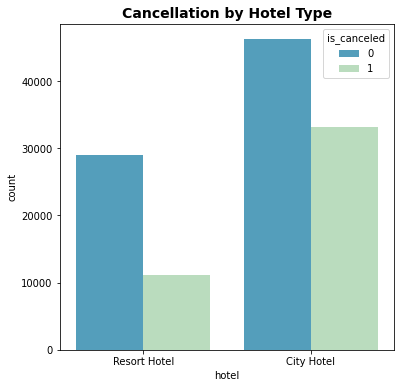

In [310]:
plt.figure(figsize=(6,6))
plt.title("Cancellation by Hotel Type", fontdict={"fontsize":14}, weight="bold")
sns.countplot(x="hotel", hue="is_canceled", data=df, palette="GnBu_r")
plt.savefig("c_hoteltype.png")
plt.show()

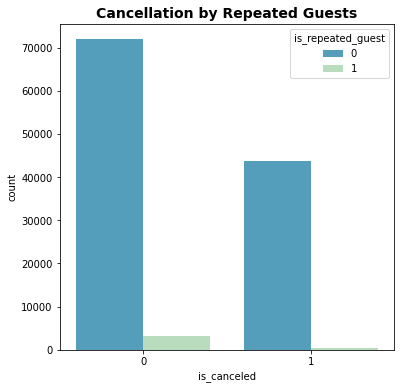

In [311]:
plt.figure(figsize=(6,6))
plt.title("Cancellation by Repeated Guests", fontdict={'fontsize':14}, weight="bold")
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=df, palette="GnBu_r")
plt.savefig("c_repeatedguests.png")
plt.show()

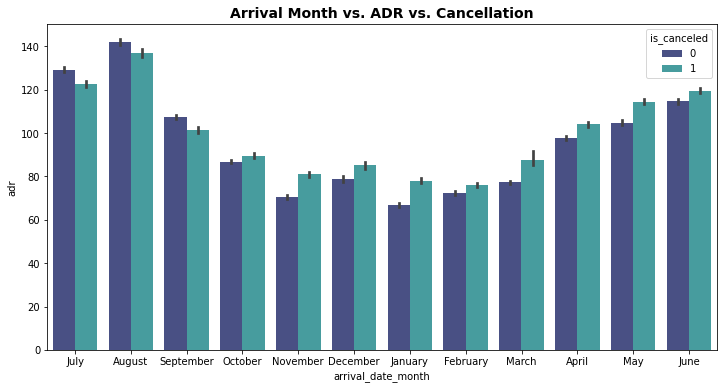

In [312]:
plt.figure(figsize=(12,6))
plt.title("Arrival Month vs. ADR vs. Cancellation", fontdict={'fontsize':14}, weight="bold")
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, data=df, palette="mako")
plt.savefig("c_month_adr.png")
plt.show()

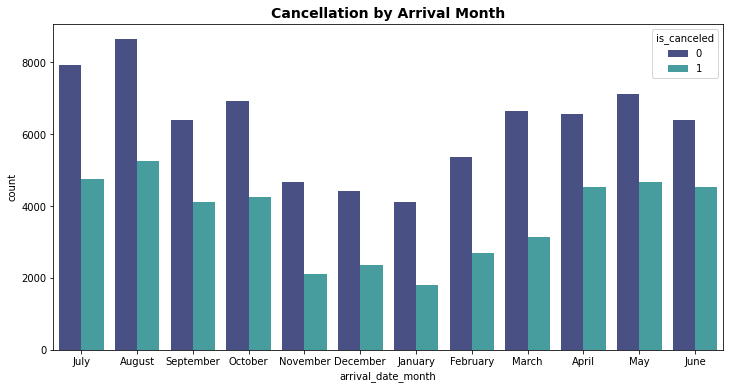

In [313]:
plt.figure(figsize=(12,6))
plt.title("Cancellation by Arrival Month", fontdict={'fontsize':14}, weight="bold")
sns.countplot(x="arrival_date_month", hue='is_canceled', data=df, palette="mako")
plt.savefig("c_month.png")
plt.show()

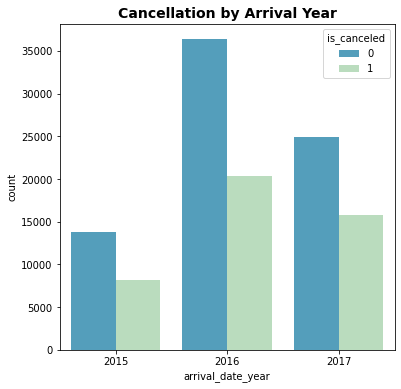

In [314]:
plt.figure(figsize=(6,6))
plt.title("Cancellation by Arrival Year", fontdict={'fontsize':14}, weight="bold")
sns.countplot(x="arrival_date_year", hue='is_canceled', data=df, palette="GnBu_r")
plt.savefig("c_year.png")
plt.show()

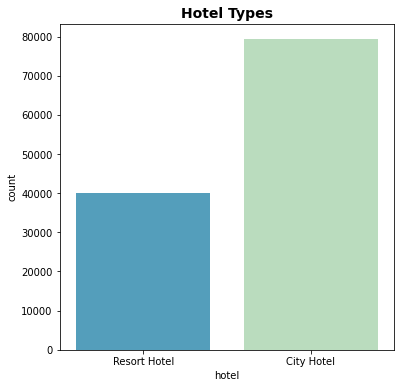

In [315]:
plt.figure(figsize=(6,6))
plt.title("Hotel Types", fontdict={'fontsize':14}, weight="bold")
sns.countplot(x="hotel", data=df, palette="GnBu_r")
plt.savefig("hotel_type.png")
plt.show()

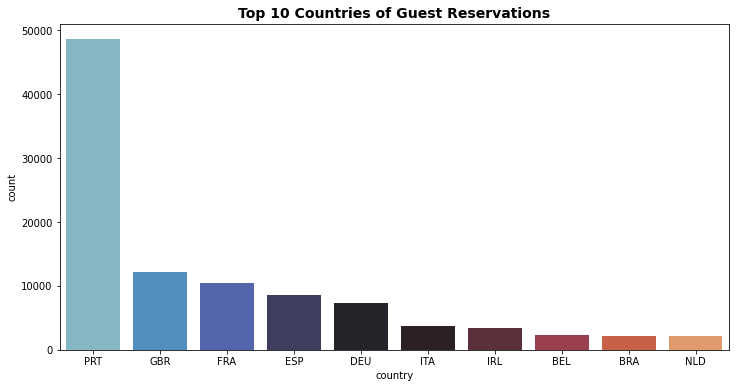

In [316]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Countries of Guest Reservations", fontdict={'fontsize':14}, weight="bold")
sns.countplot(x="country", order=pd.value_counts(df['country']).iloc[:10].index, data=df, palette="icefire")
plt.savefig("top10.png")
plt.show()

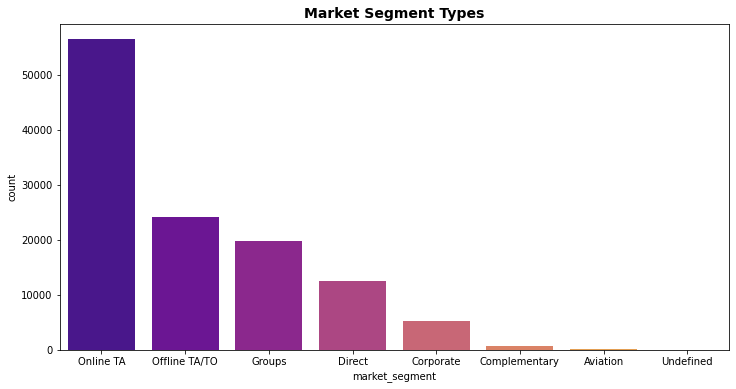

In [317]:
plt.figure(figsize=(12,6))
plt.title("Market Segment Types", fontdict={'fontsize':14}, weight='bold')
sns.countplot(x="market_segment", data=df, order=pd.value_counts(df['market_segment']).index, palette="plasma")
plt.savefig("market_segment.png")
plt.show()

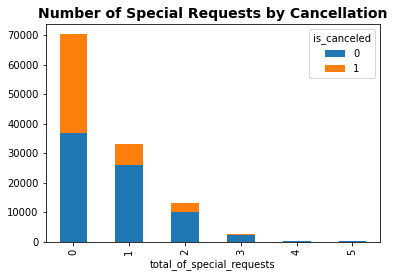

In [318]:
s_requests=df.groupby(['total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
s_requests.plot(kind='bar', stacked=True)
plt.title("Number of Special Requests by Cancellation", fontdict={'fontsize':14}, weight='bold')
plt.savefig("c_specialreq.png")
plt.show()

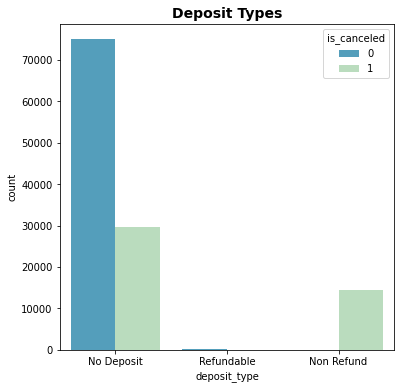

In [319]:
plt.figure(figsize=(6,6))
plt.title("Deposit Types", fontdict={'fontsize':14}, weight='bold')
sns.countplot(x="deposit_type", hue='is_canceled', data=df, palette="GnBu_r")
plt.savefig("c_deposit_type.png")
plt.show()

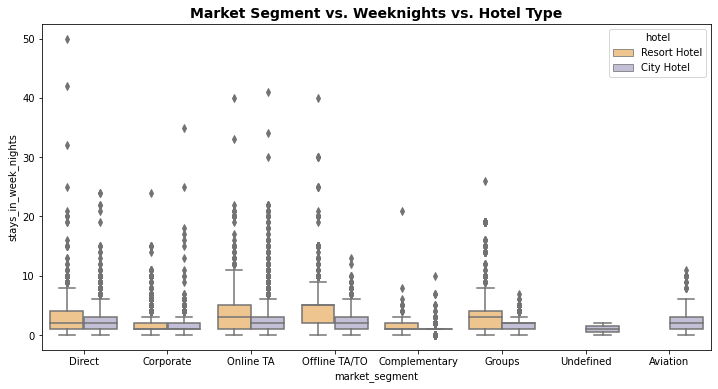

In [320]:
plt.figure(figsize=(12,6))
plt.title("Market Segment vs. Weeknights vs. Hotel Type", fontdict={'fontsize':14}, weight='bold')
sns.boxplot(x="market_segment", y="stays_in_week_nights", hue="hotel", palette="PuOr", data=df)
plt.savefig("segment_wknight_hotel.png")
plt.show()

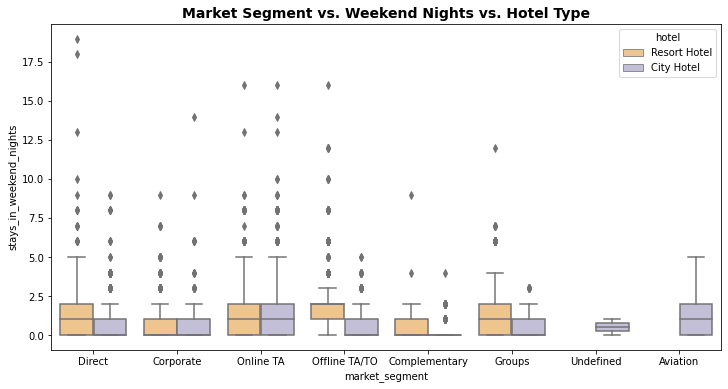

In [321]:
plt.figure(figsize=(12,6))
plt.title("Market Segment vs. Weekend Nights vs. Hotel Type", fontdict={'fontsize':14}, weight='bold')
sns.boxplot(x="market_segment", y="stays_in_weekend_nights", hue="hotel", palette="PuOr", data=df)
plt.savefig("segment_wknd_hotel.png")
plt.show()

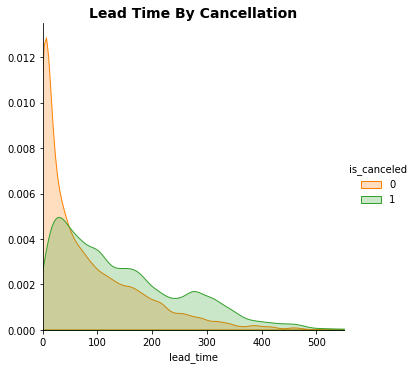

In [322]:
(sns.FacetGrid(df, hue="is_canceled", height=5, xlim=(0,550), palette="Paired_r")
    .map(sns.kdeplot, "lead_time", shade=True)
    .add_legend());
plt.title("Lead Time By Cancellation", fontdict={'fontsize':14}, weight='bold')
plt.savefig("c_leadtime.png")
plt.show()

In [323]:
# Recode variable type
df['children']=df['children'].astype('int64')
df['country']=df['country'].astype('str')

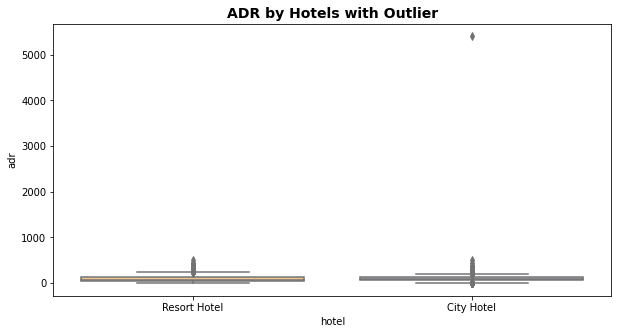

In [324]:
plt.figure(figsize=(10,5))
plt.title("ADR by Hotels with Outlier", fontdict={'fontsize':14}, weight='bold')
sns.boxplot(x="hotel", y="adr", palette="PuOr", data=df)
plt.show()

In [325]:
# Remove outliers from continuous variable ADR
df=df[df['adr'] < 5000]

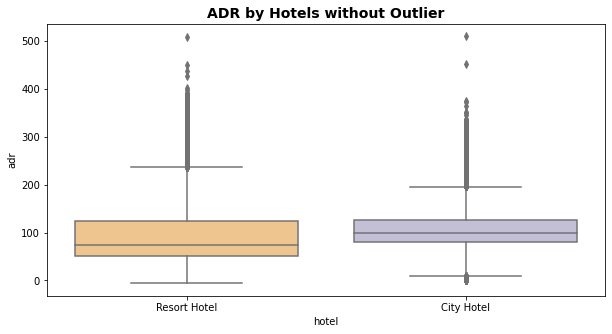

In [326]:
plt.figure(figsize=(10,5))
plt.title("ADR by Hotels without Outlier", fontdict={'fontsize':14}, weight='bold')
sns.boxplot(x="hotel", y="adr", palette="PuOr", data=df)
plt.show()

In [327]:
corr_df=df.corr()
corr_df

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293133           0.016662   
lead_time                          0.293133   1.000000           0.040141   
arrival_date_year                  0.016662   0.040141           1.000000   
arrival_date_week_number           0.008160   0.126866          -0.540566   
arrival_date_day_of_month         -0.006142   0.002273          -0.000219   
stays_in_weekend_nights           -0.001781   0.085667           0.021496   
stays_in_week_nights               0.024773   0.165796           0.030882   
adults                             0.060015   0.119520           0.029636   
children                           0.005039  -0.037614           0.054635   
babies                            -0.032490  -0.020915          -0.013192   
is_repeated_guest                 -0.084792  -0.124411           0.010341   
previous_cancellations             0.110135   0.086041          -0.119822   
previous_bookings_not_canceled    -0.057357  -0.073549           0.029218   
booking_changes                   -0.144396   0.000155           0.030875   
agent                             -0.046523  -0.012643           0.056462   
days_in_waiting_list               0.054188   0.170084          -0.056497   
adr                                0.048708  -0.065603           0.207560   
required_car_parking_spaces       -0.195496  -0.116452          -0.013685   
total_of_special_requests         -0.234652  -0.095716           0.108530   

                                arrival_date_week_number  \
is_canceled                                     0.008160   
lead_time                                       0.126866   
arrival_date_year                              -0.540566   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066819   
stays_in_weekend_nights                         0.018200   
stays_in_week_nights                            0.015552   
adults                                          0.025911   
children                                        0.005513   
babies                                          0.010395   
is_repeated_guest                              -0.030132   
previous_cancellations                          0.035500   
previous_bookings_not_canceled                 -0.020904   
booking_changes                                 0.005518   
agent                                          -0.018249   
days_in_waiting_list                            0.022932   
adr                                             0.080500   
required_car_parking_spaces                     0.001918   
total_of_special_requests                       0.026143   

                                arrival_date_day_of_month  \
is_canceled                                     -0.006142   
lead_time                                        0.002273   
arrival_date_year                               -0.000219   
arrival_date_week_number                         0.066819   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016346   
stays_in_week_nights                            -0.028167   
adults                                          -0.001568   
children                                         0.014555   
babies                                          -0.000230   
is_repeated_guest                               -0.006143   
previous_cancellations                          -0.027010   
previous_bookings_not_canceled                  -0.000299   
booking_changes                                  0.010602   
agent                                            0.000207   
days_in_waiting_list                             0.022729   
adr                                              0.030776   
required_car_parking_spaces                      0.008686   
total_of_special_requests                        0.003068   

                                stays_in_weekend_nights  stays_in_wee

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  object 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  object 
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119389 non-null  int64  
 11  babies                          119389 non-null  int64  
 12  meal            

In [329]:
# Label encoding method for categorical features into numeric.
le = preprocessing.LabelEncoder()
df['hotel']=le.fit_transform(df['hotel'])
df['arrival_date_month']=le.fit_transform(df['arrival_date_month'])
df['meal']=le.fit_transform(df['meal'])
df['country']=le.fit_transform(df['country'])
df['market_segment']=le.fit_transform(df['market_segment'])
df['distribution_channel']=le.fit_transform(df['distribution_channel'])
df['reserved_room_type']=le.fit_transform(df['reserved_room_type'])
df['assigned_room_type']=le.fit_transform(df['assigned_room_type'])
df['deposit_type']=le.fit_transform(df['deposit_type'])
df['customer_type']=le.fit_transform(df['customer_type'])


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  int32  
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  int32  
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119389 non-null  int64  
 11  babies                          119389 non-null  int64  
 12  meal            

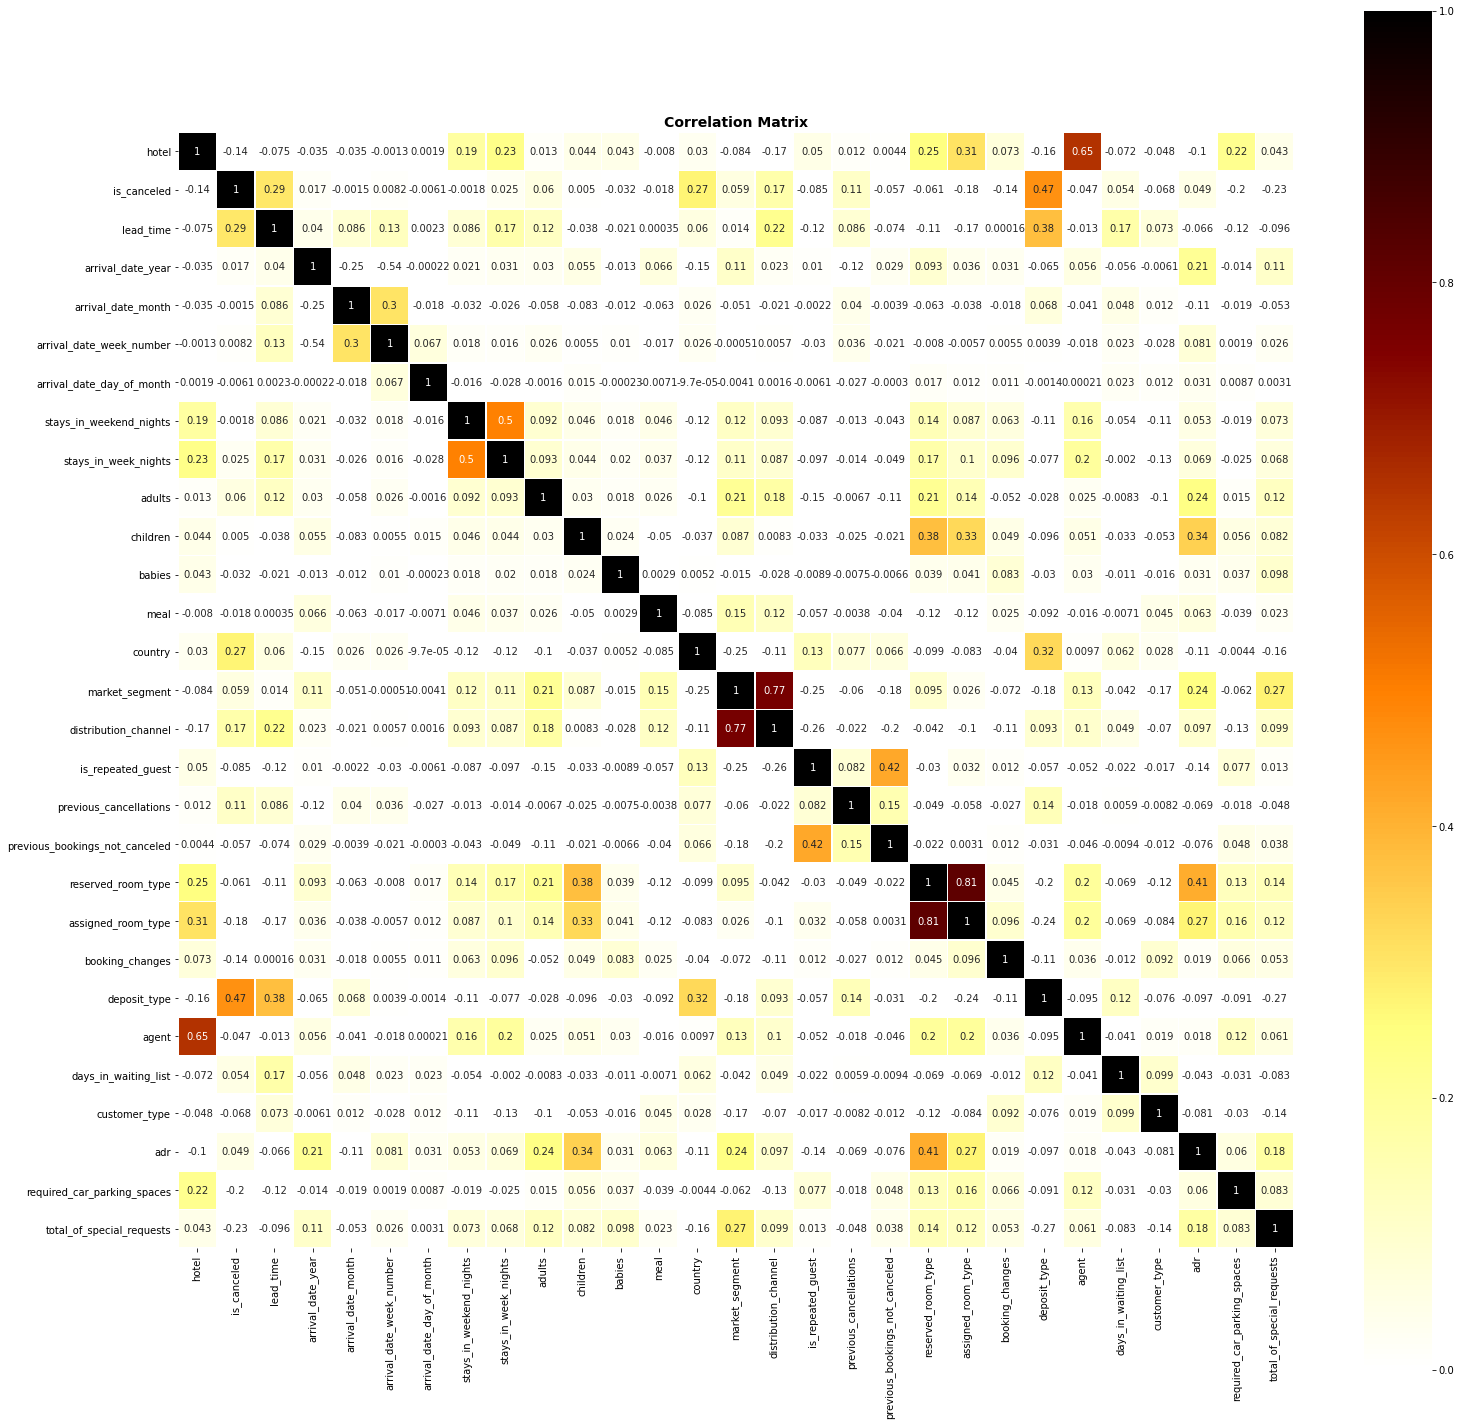

In [331]:
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix", fontdict={'fontsize':14}, weight='bold')
corr=df.corr()
sns.heatmap(corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='afmhot_r')
plt.show()

In [332]:
# Dropping columns
df=df.drop(columns=['reserved_room_type', 'assigned_room_type', 'agent'])

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  int32  
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  int32  
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119389 non-null  int64  
 11  babies                          119389 non-null  int64  
 12  meal            

In [334]:
# Dropping unnecessary column
df=df.drop(columns=['country'])

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  int32  
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  int32  
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119389 non-null  int64  
 11  babies                          119389 non-null  int64  
 12  meal            

In [336]:
# Separate the target variable 
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

# Splitting the data: 70% train and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [337]:
# Shape info
print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (83572, 24)
y train size:  (83572,)
X test size:  (35817, 24)
y test size:  (35817,)


In [338]:
# Standardizing the data set.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [339]:
# KNN algorithm
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [340]:
y_pred_knn = knn_model.predict(X_test)

In [341]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[19969  2722]
 [ 3926  9200]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     22691
           1       0.77      0.70      0.73     13126

    accuracy                           0.81     35817
   macro avg       0.80      0.79      0.80     35817
weighted avg       0.81      0.81      0.81     35817



In [342]:
precision_knn =  precision_score(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
print('Precision: ',round(precision_knn * 100,4), '%')
print('Accuracy: ',round(acc_knn * 100,4), '%')

Precision:  77.1683 %
Accuracy:  81.439 %


In [343]:
# Random forest algorithm
rf_model = RandomForestClassifier(min_samples_leaf=10, min_samples_split=10, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, min_samples_split=10)

In [344]:
y_pred_rf = rf_model.predict(X_test)

In [345]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[21402  1289]
 [ 4283  8843]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     22691
           1       0.87      0.67      0.76     13126

    accuracy                           0.84     35817
   macro avg       0.85      0.81      0.82     35817
weighted avg       0.85      0.84      0.84     35817



In [346]:
precision_rf =  precision_score(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Precision: ',round(precision_rf * 100,4), '%')
print('Accuracy: ',round(acc_rf * 100,4), '%')

Precision:  87.2779 %
Accuracy:  84.4431 %


In [347]:
# Logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [348]:
y_pred_lr = lr_model.predict(X_test)

In [349]:
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[21536  1155]
 [ 6019  7107]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     22691
           1       0.86      0.54      0.66     13126

    accuracy                           0.80     35817
   macro avg       0.82      0.75      0.76     35817
weighted avg       0.81      0.80      0.79     35817



In [350]:
precision_lr =  precision_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
print('Precision: ',round(precision_lr * 100,4), '%')
print('Accuracy: ',round(acc_lr * 100,4), '%')

Precision:  86.0203 %
Accuracy:  79.9704 %


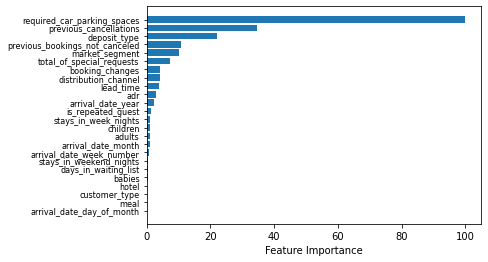

In [351]:
# Feature importance for logistic regression model
feature_importance = abs(lr_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Feature Importance')
plt.show()

In [352]:
rf_model.feature_importances_

array([1.35517008e-02, 1.36921190e-01, 2.05772373e-02, 1.82289088e-02,
       3.24200527e-02, 2.83235454e-02, 1.26840407e-02, 1.99383317e-02,
       8.02326335e-03, 3.60126754e-03, 9.08485352e-05, 1.00598077e-02,
       7.86935777e-02, 1.43484864e-02, 2.63637073e-03, 7.22670487e-02,
       3.79559485e-03, 3.16705546e-02, 2.58877119e-01, 4.04193259e-03,
       4.04099975e-02, 6.19546506e-02, 3.45506927e-02, 9.23337808e-02])

<AxesSubplot:>

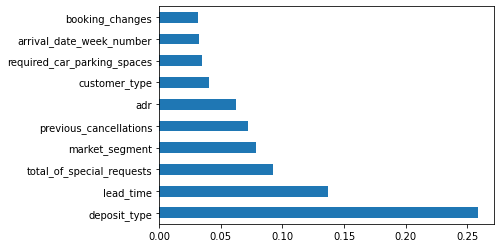

In [353]:
# Random Forest Top 10 Features
(pd.Series(rf_model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 